# **Simple Linear Regression Python Implementation**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Reading the data**
* Here we are importing the data from scikit learn

In [147]:
from sklearn.datasets import load_diabetes

In [149]:
diabetes = load_diabetes()

In [151]:
print(diabetes)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

* **Problem statement: To predict disease progression one year after baseline provided 10 features**
* **In one year how the sugar level has changed**

In [153]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [156]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [158]:
data = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

In [160]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [162]:
data['target'] = diabetes.target


In [164]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [213]:
x = data[['bmi']] #one indepenedent variable
y = data['target']

In [215]:
x

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


In [217]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [221]:
from sklearn.model_selection import train_test_split

In [223]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=2)

In [301]:
x_train

,bmi
70,-0.069797
37,0.011039
170,-0.020218
400,0.045529
286,-0.054707
...,...
299,-0.013751
22,-0.004050
72,-0.004050
15,-0.018062


In [303]:
y_train

70      48.0
37     276.0
170     47.0
400    175.0
286     60.0
       ...  
299     83.0
22      68.0
72     202.0
15     171.0
168    268.0
Name: target, Length: 353, dtype: float64

# **MODEL TRAINING** 

In [245]:
from sklearn.linear_model import LinearRegression 

In [248]:
Model = LinearRegression()

In [260]:
Model.fit(x_train,y_train)

LinearRegression()

# **VISUALIZE THE FINAL RESULT**

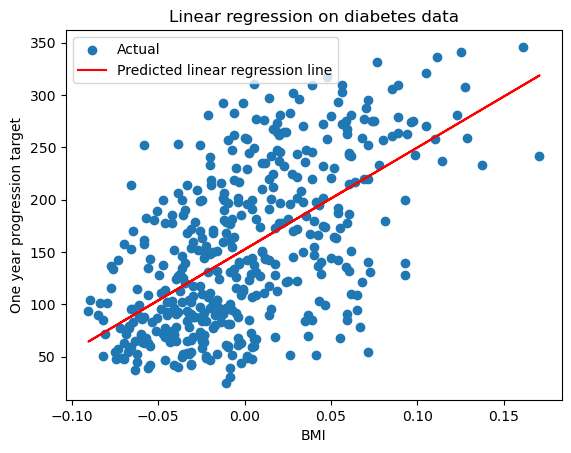

In [288]:
plt.scatter(data['bmi'],data['target'],label = "Actual")
plt.plot(x_train , Model.predict(x_train),color = 'red' , label = "Predicted linear regression line")
plt.xlabel('BMI')
plt.ylabel("One year progression target")
plt.title("Linear regression on diabetes data")
plt.legend()
plt.show()

**y = mx + c**

In [295]:
m = Model.coef_    # m is coefficient of c
c = Model.intercept_ # c is the intercept where line cuts the y-axis

In [305]:
y = m*-0.069797 + c

In [325]:
y

array([84.43812223])